In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

In [2]:
x = symbols('x')

In [3]:
f = sin(x) * cos(x)

In [4]:
x_0 = -1
x_m = 1
m = 8

In [5]:
X = [0] * (m + 1)
Y = [0] * (m + 1)
for k in range(m + 1):
    X[k] = (x_0 + (x_m - x_0) * k / m)
    Y[k] = f.subs(x, X[k])
    print(X[k], Y[k])

-1.0 -0.454648713412841
-0.75 -0.498747493302027
-0.5 -0.420735492403948
-0.25 -0.239712769302102
0.0 0
0.25 0.239712769302102
0.5 0.420735492403948
0.75 0.498747493302027
1.0 0.454648713412841


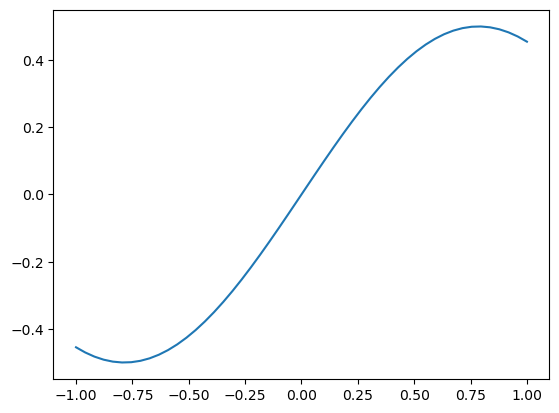

In [6]:
fx = lambdify(x, f, modules = ['numpy'])
x_vals = np.linspace(x_0, x_m)
plt.plot(x_vals, fx(x_vals))

In [7]:
Q = 0
t = symbols('t')
for k in range(0, m + 1):
    l = 1
    for i in range(0, m + 1):
        if i != k:
            l = l * ((t - X[i]) / (X[k] - X[i]))
    Q = Q + l * Y[k]

In [8]:
expand(Q)

-0.0114366918248523*t**7 - 7.105427357601e-15*t**6 + 0.13262573102561*t**5 - 5.55111512312578e-17*t**4 - 0.66653453428863*t**3 + 0.999994208500717*t

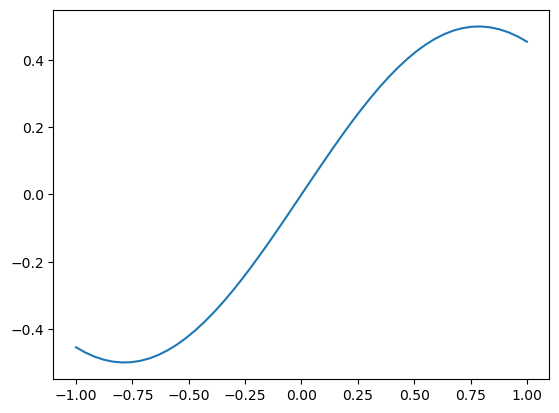

In [9]:
Qt = lambdify(t, Q, modules = ['numpy'])
t_vals = np.linspace(x_0, x_m)
plt.plot(t_vals, Qt(t_vals))

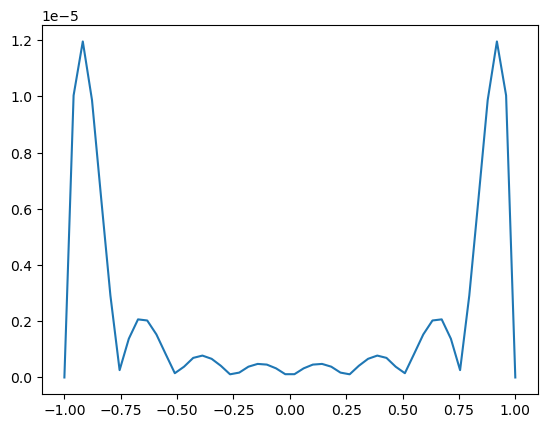

In [10]:
err = lambdify(t, abs(f.subs(x, t) - Q), modules = ['numpy'])
plt.plot(t_vals, err(t_vals))

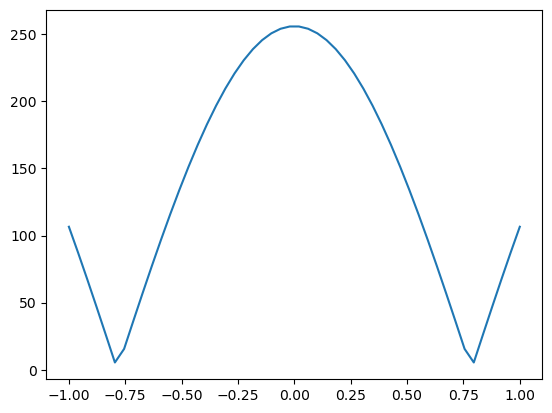

In [11]:
derr = lambdify(x, abs(diff(f, (x, m + 1))), modules = ['numpy'])
plt.plot(x_vals, derr(x_vals))

In [23]:
M = maximum(diff(f, (x, m + 1)), x, Interval(x_0, x_m))
print(M)

256


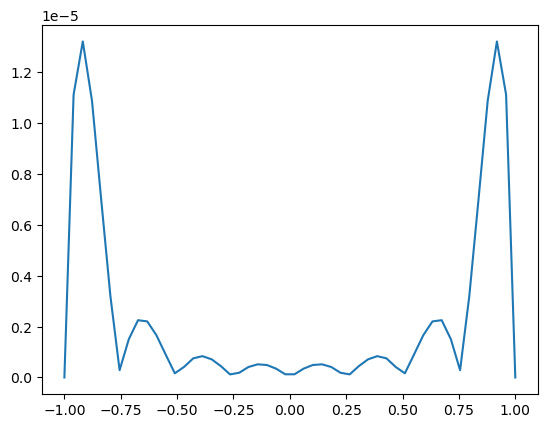

In [31]:
err_max = lambdify(x, M / factorial(m + 1) * abs(prod([(x - X[k]) for k in range(0, m + 1)])), modules = ['numpy'])
plt.plot(x_vals, err_max(x_vals))

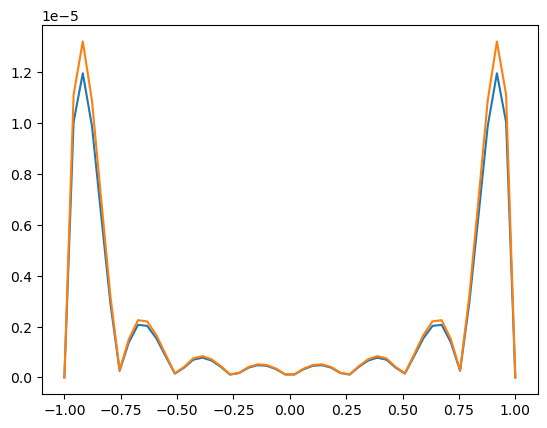

In [32]:
plt.plot(x_vals, err(x_vals))
plt.plot(x_vals, err_max(x_vals))